In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [2]:
train = pd.read_csv('fashion-mnist_train.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('fashion-mnist_test.csv')

In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### the labels:

0 =	T-shirt/top

1 =	Trouser

2 =	Pullover

3 =	Dress

4 =	Coat

5 =	Sandal

6 =	Shirt

7 =	Sneaker

8 =	Bag

9 =	Ankle boot



In [6]:

class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

#  From number to Item of fashion:

def get_label_cls(label):
    return class_table[label]

get_label_cls(3)

'Dress'

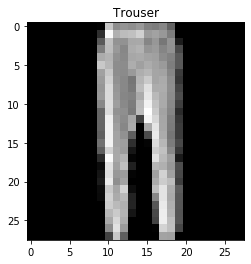

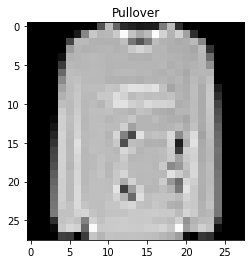

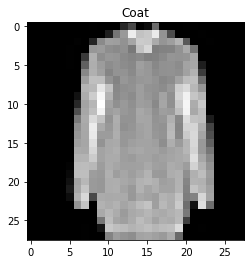

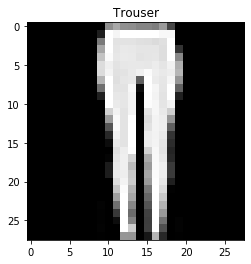

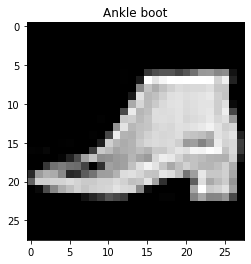

In [7]:
# Example of the pictures

for i in range(5000,5005): 
    sample = np.reshape(test[test.columns[1:]].iloc[i].values, (28,28))
    plt.figure()
    plt.title(get_label_cls(test["label"].iloc[i]))
    plt.imshow(sample, 'gray')

### Split into X and y both training set and testing set


In [8]:
X_train = train.drop('label',axis=1)
y_train = train['label']
X_test = test.drop('label',axis=1)
y_test = test['label']

In [9]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA


lets try diffrent options in PCA,  and find the optimle option by comparison Random-Forest's score in each option:

#### 300 pixels:

In [10]:
pca1 = PCA(n_components=300)
pca1.fit(X_train)
pca_x_train = pca1.transform(X_train)
pca_x_test = pca1.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df1 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df1 = pd.DataFrame(data = pca_x_test)/255

In [11]:
rf = RandomForestClassifier(n_estimators=100)
score_rf1 = cross_val_score(rf, pca_x_train_df1, y_train, cv=5)
print (score_rf1.mean())

0.85795


#### 196 pixels:

In [12]:
pca2 = PCA(n_components=196)
pca2.fit(X_train)
pca_x_train = pca2.transform(X_train)
pca_x_test = pca2.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df2 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df2 = pd.DataFrame(data = pca_x_test)/255

In [13]:
rf = RandomForestClassifier(n_estimators=100)
score_rf2 = cross_val_score(rf, pca_x_train_df2, y_train, cv=5)
print (score_rf2.mean())

0.8612666666666666


#### 100 pixels:

In [14]:
pca3 = PCA(n_components=100)
pca3.fit(X_train)
pca_x_train = pca3.transform(X_train)
pca_x_test = pca3.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df3 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df3 = pd.DataFrame(data = pca_x_test)/255

In [15]:
rf = RandomForestClassifier(n_estimators=100)
score_rf3 = cross_val_score(rf, pca_x_train_df3, y_train, cv=5)
print (score_rf3.mean())

0.8666833333333333


#### 50 pixels:

In [16]:
pca4 = PCA(n_components=50)
pca4.fit(X_train)
pca_x_train = pca4.transform(X_train)
pca_x_test = pca4.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df4 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df4 = pd.DataFrame(data = pca_x_test)/255

In [17]:
rf = RandomForestClassifier(n_estimators=100)
score_rf4 = cross_val_score(rf, pca_x_train_df4, y_train, cv=5)
print (score_rf4.mean())

0.8655999999999999


In [18]:
score = [score_rf1.mean(), score_rf2.mean(), score_rf3.mean(), score_rf4.mean()]
score_by_pixel = pd.DataFrame ( data= score, index = ['300 pixels', '196 pixels', '100 pixels', '50 pixels'] )
score_by_pixel

,0
300 pixels,0.857950
196 pixels,0.861267
100 pixels,0.866683
50 pixels,0.865600


#### --->  the optimal option is:   n_components= 100 (pca3)

In [19]:
pca_x_train_df3.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.686333,4.960529,-0.051232,-2.733349,0.391787,1.149178,0.875894,2.567449,1.114391,0.786255,...,0.041823,0.391885,0.100088,-0.437797,0.044220,-0.563546,0.241890,0.181594,-0.134905,-0.298259
1,-4.376434,3.861059,-1.949433,-0.803178,0.451490,-0.779967,-1.230174,1.014531,-1.412427,-0.985630,...,-0.375530,0.429826,0.075743,-0.080515,-0.087569,-0.171063,-0.333534,0.162267,-0.314325,0.188808
2,7.265152,1.568757,2.315239,0.222004,1.048076,-1.161953,-1.070445,-0.301790,0.431266,-0.090305,...,0.121003,0.138430,0.066094,0.180475,0.192354,-0.024852,0.057550,0.298356,0.035962,-0.174292
3,3.227788,-2.325256,-0.649302,1.201164,-0.273992,3.971531,-0.525023,-0.135215,0.050613,-0.620054,...,0.032013,0.289830,-0.252708,-0.175423,0.170004,-0.119145,-0.253606,0.050170,0.144891,0.130155
4,4.146373,-4.039080,-1.515247,-1.861385,0.561363,0.067154,-0.696509,-0.157455,2.034536,-0.336144,...,-0.048066,0.495846,-0.026006,-0.169025,-0.302668,-0.264519,-0.059342,-0.196457,0.583756,0.179883


In [20]:
y_train_pd = pd.DataFrame(data = y_train)
y_train_pd.head()

,label
0,2
1,9
2,6
3,0
4,3


#### the influence of PCA on picture's quality

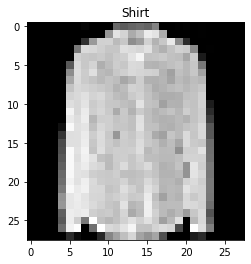

In [21]:
#before:
sample = np.reshape(X_train.iloc[2].values, (28,28))
plt.figure()
plt.title(get_label_cls(y_train_pd["label"].iloc[2]))
plt.imshow(sample, 'gray')

In [22]:
#after:

xx = pca2.ivnerse_transform(pca_x_train_df2)
sample = np.reshape(xx.iloc[2].values, (14,14))
plt.figure()
plt.title(get_label_cls(y_train_pd["label"].iloc[2]))
plt.imshow(sample, 'gray')

AttributeError: 'PCA' object has no attribute 'ivnerse_transform'

## Models  &  Cross-Validation

#### Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(rf, pca_x_train_df3, y_train, cv=5)
print ("Random Forest's score:  ", score_rf.mean())

Random Forest's score:   0.8661166666666666


#### AdaBoost

In [24]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
score_abc = cross_val_score(abc, pca_x_train_df3, y_train, cv=5)
print ("AdaBoost's score:  ", score_abc.mean())

AdaBoost's score:   0.5533833333333333


#### Decision Tree

In [25]:
from sklearn import tree
score_dt_by_i = []

for i in range (5,20):
    dt = tree.DecisionTreeClassifier(random_state=7, max_depth=i)
    score_dt = cross_val_score(dt, pca_x_train_df3, y_train, cv=5)
    score_dt_by_i.append(score_dt.mean())

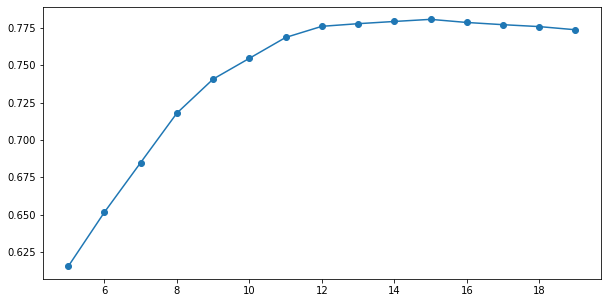

In [26]:
plt.figure(figsize=(10,5))    
plt.plot(range(5,20), score_dt_by_i, marker='o')

--->  the optimal depth is 14:

In [27]:
dt = tree.DecisionTreeClassifier(random_state=7, max_depth=14)
score_dt = cross_val_score(dt, pca_x_train_df3, y_train, cv=5)
print ("Decision Tree's score: ", score_dt.mean())

Decision Tree's score:  0.77925


#### Knn

In [28]:
#find the optimal K:

score_knn_by_i = []

for i in range (2,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    score_knn = cross_val_score(knn, pca_x_train_df3, y_train, cv=5)
    score_knn_by_i.append(score_dt.mean())


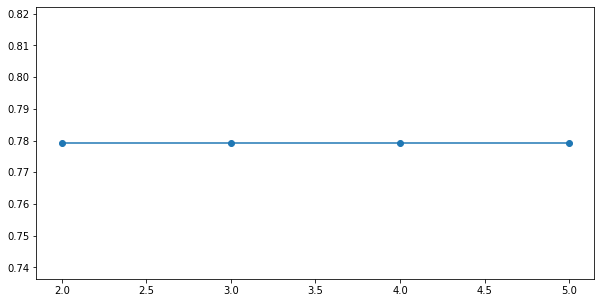

In [29]:
plt.figure(figsize=(10,5))    
plt.plot(range(2,6), score_knn_by_i, marker='o')

--->  the score is the same so we take randomly k=2

In [30]:
knn = KNeighborsClassifier(n_neighbors=2)
score_knn = cross_val_score(knn, pca_x_train_df3, y_train, cv=5)
print ("knn's score: ", score_knn.mean())

knn's score:  0.8475666666666666


#### Naive Bayes

In [31]:
nb = GaussianNB()
score_nb = cross_val_score(nb, pca_x_train_df3, y_train, cv=5)
print (score_nb.mean())

0.7664333333333333


In [32]:
all_score = pd.DataFrame ( data= [score_rf.mean(), score_abc.mean(), score_dt.mean(), score_knn.mean(), score_nb.mean()],
                          index = ['Random Forest', 'AdaBoost', 'Decision Tree', 'knn', 'Naive Bayes' ] )

In [33]:
all_score

,0
Random Forest,0.866117
AdaBoost,0.553383
Decision Tree,0.779250
knn,0.847567
Naive Bayes,0.766433


#### ---> the best model is Random Forest

### training the model

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix

rf.fit(pca_x_train_df3, y_train )
y_pred = rf.predict(pca_x_test_df3)


In [35]:
conf_mat = confusion_matrix(y_test, y_pred)
index = ['Actually T-shirt', 'Actually Trouser', 'Actually Pullover', 'Actually Dress', 'Actually Coat',
         'Actually Sandal', 'Actually Shirt', 'Actually Sneaker', 'Actually Bag', 'Actually Ankle boot']
columns= ['Predicted as T-shirt', 'Predicted as Trouser', 'Predicted as Pullover', 'Predicted as Dress',
         'Predicted as Coat','Predicted as Sandal', 'Predicted as Shirt', 'Predicted as Sneaker', 
          'Predicted as Bag', 'Predicted as Ankle boot']
conf_mat_pd = pd.DataFrame(data =conf_mat, index=index, columns=columns)
conf_mat_pd

,Predicted as T-shirt,Predicted as Trouser,Predicted as Pullover,Predicted as Dress,Predicted as Coat,Predicted as Sandal,Predicted as Shirt,Predicted as Sneaker,Predicted as Bag,Predicted as Ankle boot
Actually T-shirt,850,0,15,32,2,4,83,0,14,0
Actually Trouser,3,959,8,21,0,0,9,0,0,0
Actually Pullover,12,0,793,10,107,2,66,0,10,0
Actually Dress,28,8,10,904,26,1,20,0,3,0
Actually Coat,1,1,70,24,852,0,45,0,7,0
Actually Sandal,0,0,0,0,0,912,1,55,9,23
Actually Shirt,174,0,103,28,81,0,599,0,15,0
Actually Sneaker,0,0,0,0,0,36,0,901,0,63
Actually Bag,2,0,7,4,3,13,4,3,962,2
Actually Ankle boot,0,0,0,0,0,18,0,44,0,938


In [36]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.79      0.79      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.80      0.85      0.82      1000
           5       0.92      0.91      0.92      1000
           6       0.72      0.60      0.66      1000
           7       0.90      0.90      0.90      1000
           8       0.94      0.96      0.95      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

